In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp2.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.873420,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.000000,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.0,0.0,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.904901,0.198069,0.741857,0.271532,1.999516,1.105093,1.334629,0.219178,0.000000,0.547945
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.741435,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.000000,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.0,0.0,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,1.014705,0.353106,0.768454,0.098188,1.605018,0.985509,1.301313,0.082329,0.899598,0.018072
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.0,0.0,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.897872,0.263493,0.544247,0.313578,2.351887,1.113744,1.805748,0.496552,0.000000,0.458621


In [5]:
df_products.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.018909,0.000029,0.005388,0.005105,0.001281,0.019871,0.030651,0.065792,0.110676,...,0.966327,0.195398,0.633121,0.340620,2.562601,1.074286,1.597986,0.393717,0.011385,0.534317
std,2.390213,0.026430,0.000204,0.011510,0.010991,0.009809,0.024497,0.021321,0.033974,0.071854,...,0.199948,0.130354,0.109056,0.071208,0.469688,0.244186,0.298884,0.150889,0.091434,0.174637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.356160,0.023759,0.287578,0.045344,1.016313,0.516644,0.872874,0.000000,0.000000,0.018072
25%,0.000000,0.007959,0.000000,0.000000,0.000000,0.000000,0.001452,0.016758,0.042784,0.064043,...,0.860813,0.105064,0.561844,0.316934,2.321934,0.942162,1.404401,0.305158,0.000000,0.406329
50%,0.000000,0.014540,0.000000,0.000000,0.000000,0.000000,0.012185,0.028811,0.064717,0.100138,...,0.925978,0.179806,0.620371,0.335670,2.476203,1.079823,1.571104,0.422520,0.000000,0.504404
75%,0.000000,0.021448,0.000000,0.003994,0.005634,0.000000,0.026420,0.040990,0.084122,0.144753,...,1.058618,0.258490,0.704970,0.358035,2.720990,1.160167,1.769408,0.508128,0.000000,0.657991
max,10.000000,0.229009,0.002217,0.065330,0.076190,0.111111,0.136684,0.120482,0.148571,0.500000,...,1.935569,0.983949,1.056295,0.776947,4.798521,2.807727,3.515269,0.678748,0.899598,1.000000


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [6]:
corr_matrix = df_products.corr()

In [7]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
cat_code,1.000000,-0.165161,-0.053913,0.012399,0.156458,0.319810,-0.007618,-0.075091,-0.190599,0.088835,...,-0.150774,0.294610,0.034744,0.013701,0.044998,0.237868,0.016951,-0.443946,0.107906,0.250319
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.165161,1.000000,0.034796,0.435443,0.271330,-0.039674,0.015303,-0.017212,0.363418,0.160178,...,0.066170,-0.106165,0.103239,-0.105728,-0.071608,-0.116095,-0.132348,0.071422,0.008799,-0.087103
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053913,0.034796,1.000000,0.113993,0.013425,-0.018222,-0.027578,0.042309,0.130030,-0.050012,...,0.112262,-0.057705,0.005781,-0.060787,-0.019313,-0.093085,0.005121,0.164718,-0.018024,-0.143145
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012399,0.435443,0.113993,1.000000,0.445524,-0.029620,0.027997,0.221156,0.296563,-0.101790,...,0.432859,-0.316590,0.216763,-0.016746,0.064929,-0.295403,-0.144387,0.075331,-0.058745,-0.129177
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.156458,0.271330,0.013425,0.445524,1.000000,-0.024087,0.018940,0.245958,0.441273,-0.147891,...,0.217776,-0.057996,0.188264,-0.124205,-0.061021,-0.201246,-0.166835,0.071171,-0.044325,-0.126301


In [8]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.6 and c1 != c2: 
            print (c1, c2)

source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 week_number_quantity_10
source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 week_number_quantity_27
source_channel_quantity_7261d300057219056592010c7bdaf5ee month_quantity_8
week_number_quantity_1 month_quantity_1
week_number_quantity_1 week_of_month_quantity_3
week_number_quantity_2 week_number_quantity_3
week_number_quantity_2 month_quantity_1
week_number_quantity_3 week_number_quantity_2
week_number_quantity_3 week_number_quantity_4
week_number_quantity_4 week_number_quantity_3
week_number_quantity_6 week_number_quantity_22
week_number_quantity_6 month_quantity_2
week_number_quantity_7 month_quantity_2
week_number_quantity_9 week_number_quantity_10
week_number_quantity_9 month_quantity_3
week_number_quantity_10 source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2
week_number_quantity_10 week_number_quantity_9
week_number_quantity_10 month_quantity_3
week_number_quantity_10 quarter_quantity_4
week_number_quantity_14 we

since there is a high correlation between the weeknumbers and the month

In [9]:
## import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd   

""" Usage: pandas_entropy(df['column1']) """

def column_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()
## https://stackoverflow.com/questions/49685591/how-to-find-the-entropy-of-each-column-of-data-set-by-python

In [10]:
c_to_drop = []
for c in df_products.columns : 
    col_entropy = column_entropy(df_products[c])
    if (col_entropy > 4.8 or col_entropy < 0.4) and c != 'cat_code' or 'week_number_quantity' in c: 
        c_to_drop.append(c)
    print(c, col_entropy)
print(c_to_drop)

cat_code 0.8543757341118429
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8 4.486373518070386
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac 0.3591454700136032
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7 2.004545134279902
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9 2.4882555663765373
source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 0.8902049101696919
source_channel_quantity_7261d300057219056592010c7bdaf5ee 4.105704654834601
source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58 4.589711909153738
source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002 4.728905014343594
source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a 4.7888628452894
source_channel_quantity_af082bb0c2fa1414655017d464aa0262 4.16168688042207
source_channel_quantity_b76eb9b8fc0f17098812da9117d3e500 4.8248792393442015
source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16 0.09015080598088239
source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9 4.6061670436

In [11]:
## higher entropy indicates an unlikely event https://towardsdatascience.com/the-intuition-behind-shannons-entropy-e74820fe9800

In [12]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if                                             
                                            c in c_to_drop
                                           ])

In [13]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_5,month_quantity_6,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,0.000000,...,0.121951,0.121951,0.000000,0.000000,0.024390,0.268293,0.073171,0.121951,0.000000,1.000000
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.000000,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,0.000000,...,0.068493,0.000000,0.082192,0.068493,0.000000,0.000000,0.191781,0.164384,0.000000,1.000000
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,0.000000,...,0.147727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.005682,0.994318
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.000000,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,0.004016,...,0.082329,0.082329,0.146586,0.084337,0.070281,0.082329,0.134538,0.074297,0.000000,1.000000
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.000000,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,0.006897,...,0.131034,0.006897,0.006897,0.000000,0.000000,0.000000,0.200000,0.227586,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.120000,0.000000,...,0.000000,0.080000,0.000000,0.040000,0.000000,0.040000,0.320000,0.200000,0.040000,0.960000
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.030036,0.008192,...,0.084951,0.049454,0.133192,0.066141,0.037015,0.047633,0.229369,0.141990,0.002731,0.997269
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023559,0.042861,0.011070,0.0,0.007664,0.069827,0.076923,0.041158,0.004825,...,0.156401,0.065569,0.066705,0.051944,0.018734,0.040590,0.281294,0.059041,0.000568,0.999432


In [14]:
df_products_out.shape

(130, 24)

## Using Elbow optimization with KMeans

In [15]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'month_quantity_1', 'month_quantity_2', 'month_quantity_4',
       'month_quantity_5', 'month_quantity_6', 'month_quantity_7',
       'month_quantity_8', 'month_quantity_9', 'month_quantity_10',
       'month_quantity_11', 'month_quantity_12',
       'perc_pis_cofins_quantity_0.0', 'perc_pis_cofins_quantity_9.

In [16]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=1)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.0200378025845316
error = 1.0200378025845316
###############################
Number of Clusters: 3
Starting K-means++
Finished
J = 0.2706349087258354
error = 0.7494028938586962
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.17900597895856787
error = 0.09162892976726753
###############################
Number of Clusters: 5
Starting K-means++
Finished
J = 0.14047888428252223
error = 0.03852709467604565
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.11185458552909777
error = 0.028624298753424454
###############################
Number of Clusters: 7
Starting K-means++
Finished
J = 0.0874065085149259
error = 0.02444807701417187
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.07661387163322377
error = 0.010792636881702136
###############################
Number of Clusters: 9
Starting K-

In [17]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [18]:
len(cluster_result.labels_)

130

In [19]:
cluster_result.n_features_in_

24

In [20]:
# cluster_result.cluster_centers_

In [21]:
df_centroids = pd.DataFrame(cluster_result.cluster_centers_, columns=df_products_out.columns)
df_centroids

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_5,month_quantity_6,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25
0,1.554312e-15,2.051197e-02,0.005403,0.003927,0.000460,0.020175,0.029782,0.067444,0.111257,6.249090e-03,...,0.130595,0.039484,0.049961,0.045448,0.059986,0.062280,0.108697,0.088523,0.002787,0.997213
1,5.000000e+00,1.592985e-02,0.000000,0.009132,0.000000,0.000000,0.019380,0.030744,0.137473,8.673617e-19,...,0.072073,0.026667,0.027397,0.036164,0.000000,0.013333,0.170594,0.123355,0.015227,0.984773
2,8.666667e+00,4.115226e-03,0.010582,0.002058,0.000000,0.045561,0.005585,0.036155,0.255299,1.175779e-03,...,0.018673,0.021922,0.043380,0.041632,0.083867,0.045948,0.108450,0.065844,0.000294,0.999706
3,3.000000e+00,0.000000e+00,0.000000,0.000000,0.005263,0.000000,0.000000,0.015789,0.015789,0.000000e+00,...,0.000000,0.005263,0.005263,0.047368,0.036842,0.168421,0.200000,0.231579,0.010526,0.989474
4,1.000000e+01,3.469447e-18,0.000000,0.000000,0.037037,0.006803,0.006803,0.020408,0.077853,8.673617e-19,...,0.187075,0.013605,0.121693,0.006803,0.020408,0.034014,0.013605,0.081633,0.037037,0.962963
5,4.000000e+00,1.200068e-02,0.007665,0.007700,0.000176,0.017927,0.060226,0.068502,0.078311,1.134144e-02,...,0.070193,0.030385,0.050630,0.056581,0.112338,0.089893,0.165879,0.129254,0.001004,0.998996
6,6.000000e+00,1.906536e-02,0.017344,0.055682,0.000000,0.029256,0.032059,0.126625,0.095000,5.712617e-03,...,0.073694,0.082923,0.082658,0.095254,0.143770,0.095361,0.061287,0.089873,1.000000,0.000000
7,7.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.142857,1.785714e-02,...,0.571429,0.017857,0.017857,0.000000,0.125000,0.178571,0.000000,0.035714,0.000000,1.000000
8,1.333333e+00,2.986560e-02,0.000000,0.013605,0.000000,0.028538,0.050274,0.096400,0.069189,8.673617e-19,...,0.040650,0.081467,0.006803,0.047619,0.137382,0.171064,0.024390,0.103009,0.000000,1.000000


In [22]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.0200378025845316, 0.2706349087258354, 0.17900597895856787, 0.14047888428252223, 0.11185458552909777, 0.0874065085149259, 0.07661387163322377, 0.07004023218478556]
Ks  [2, 3, 4, 5, 6, 7, 8, 9]


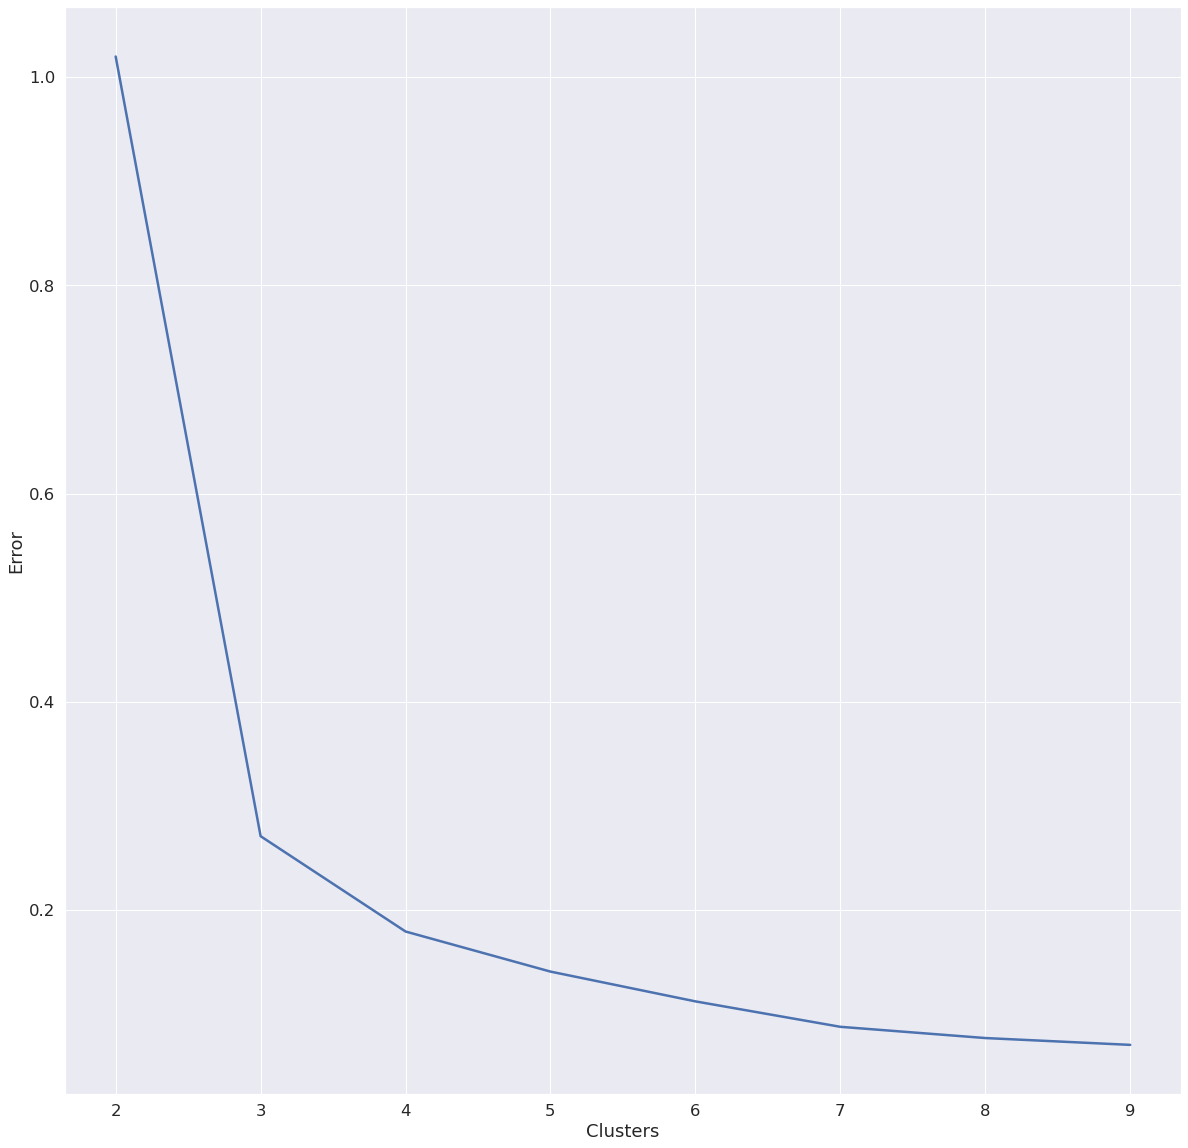

In [23]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

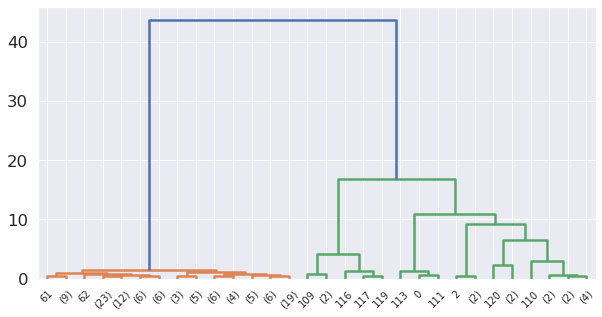

In [24]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [25]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 9)

In [26]:
df_products_out['hc_cluster'] = clusters

In [27]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,1,106
1,5,3
2,3,3
3,9,1
4,2,3
5,8,8
6,6,2
7,7,1
8,4,3


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

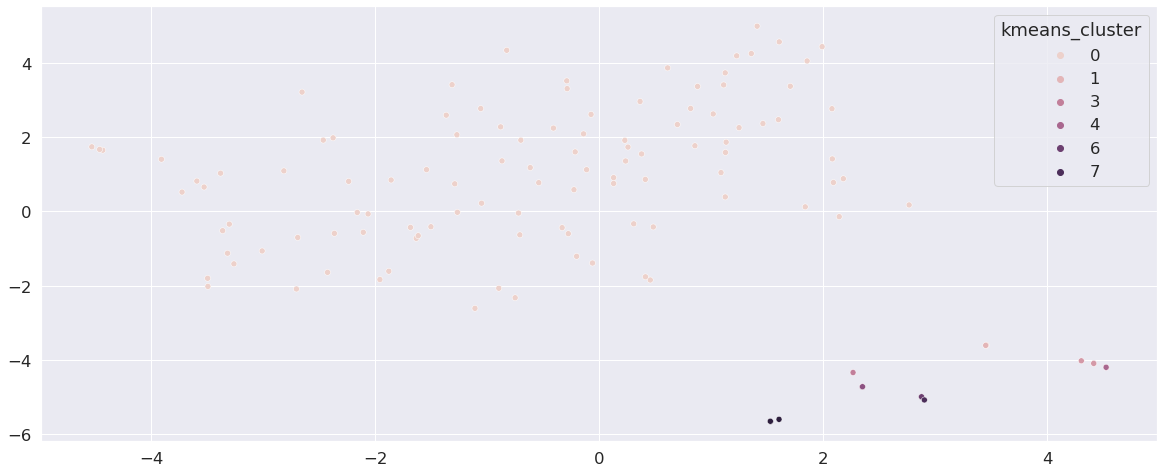

In [28]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

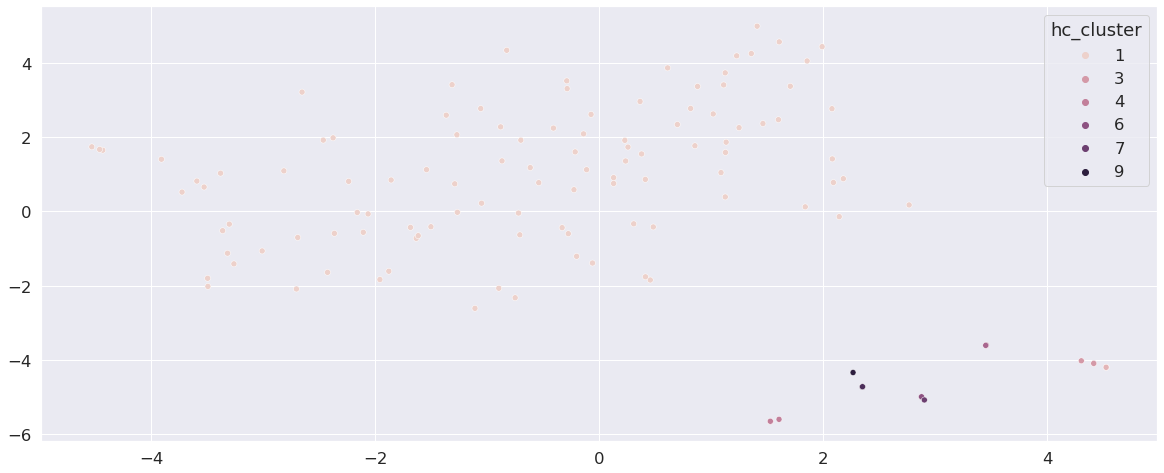

In [29]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [30]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.17240840489768403

Calinski and Harabaz
2950.9450436111097

Silhouette Score
0.915142866325791



In [31]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.17240840489768403

Calinski and Harabaz
2950.9450436111097

Silhouette Score
0.915142866325791



In [32]:
df_products_out.to_csv('../data/products_features_exp4.csv')

## Visualizing the centroids

In [33]:
month_cols = [c for c in df_centroids.columns if 'month' in c]

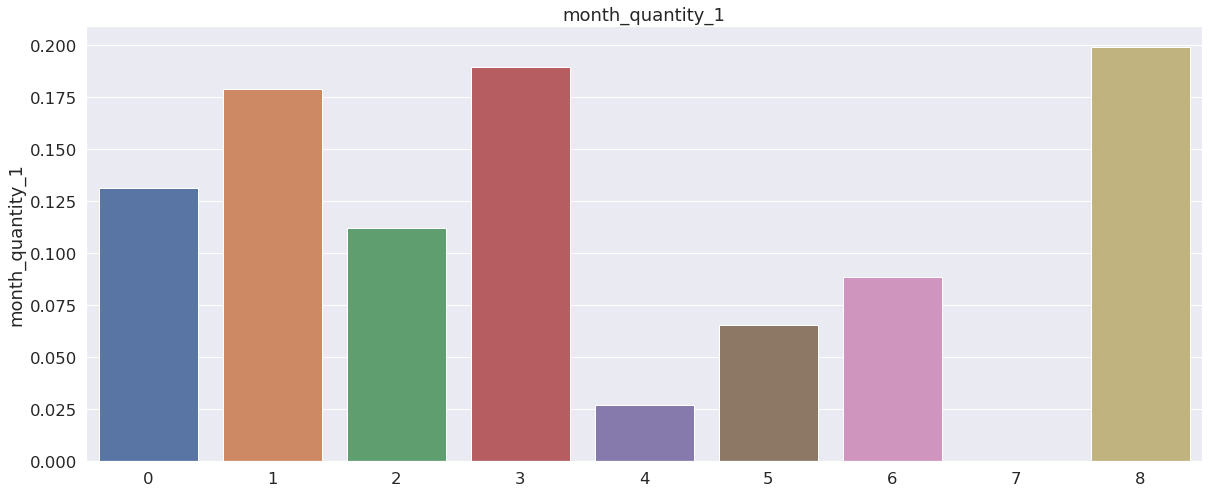

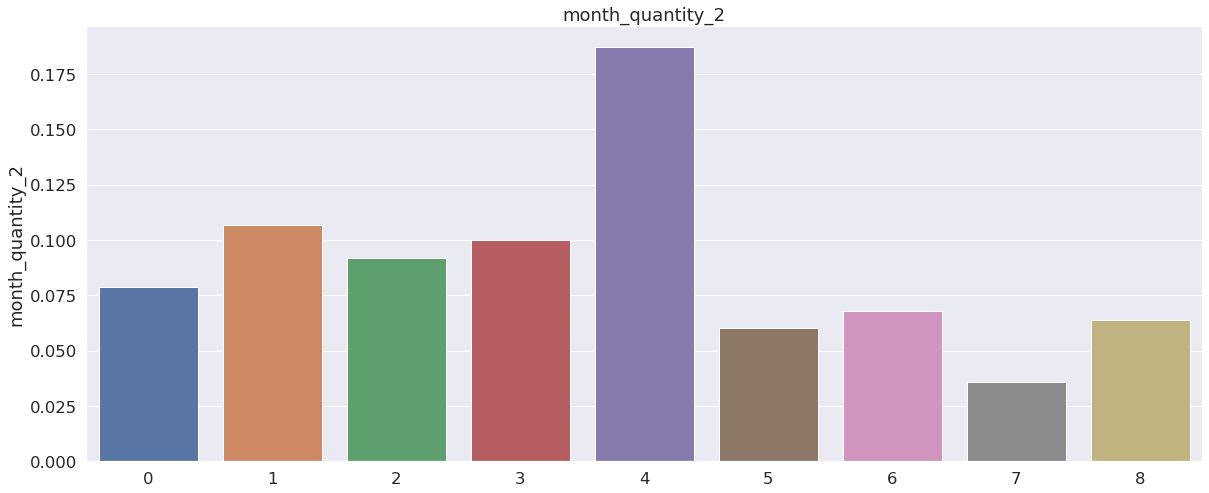

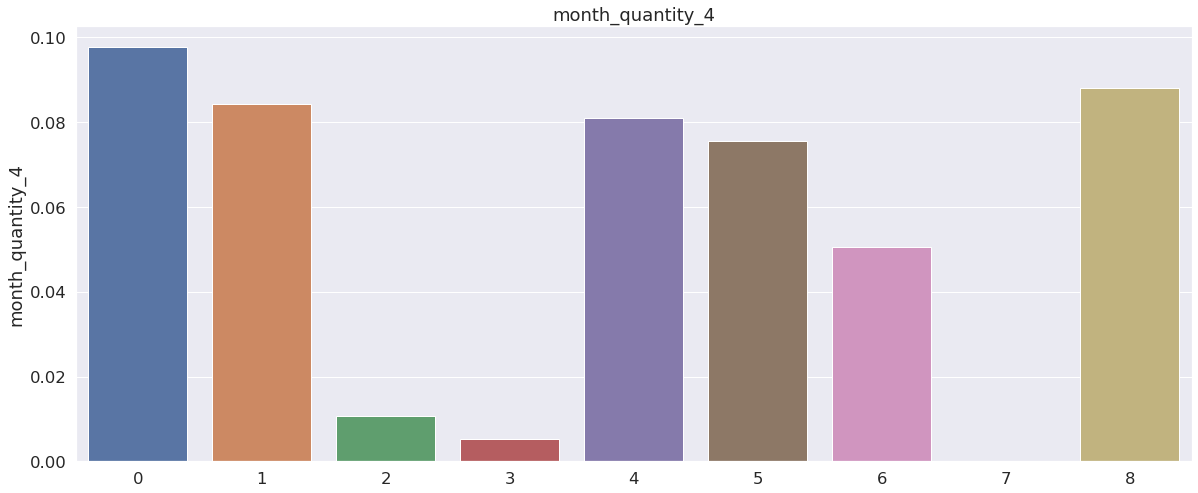

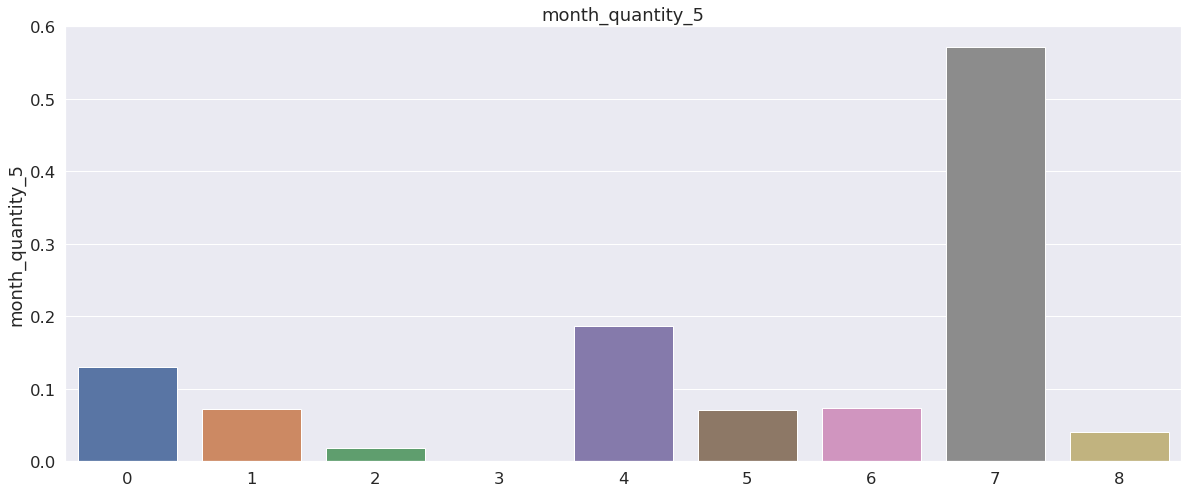

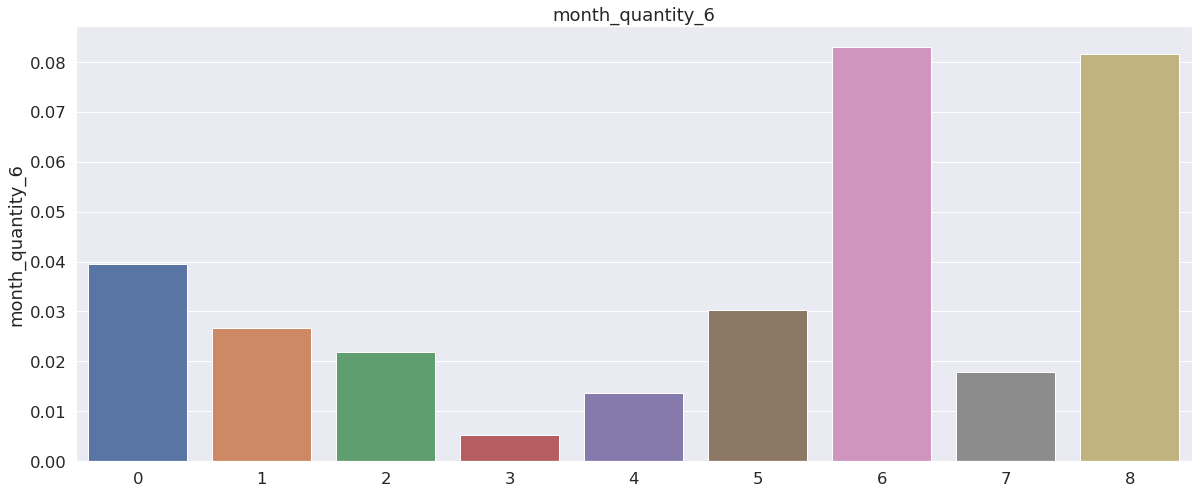

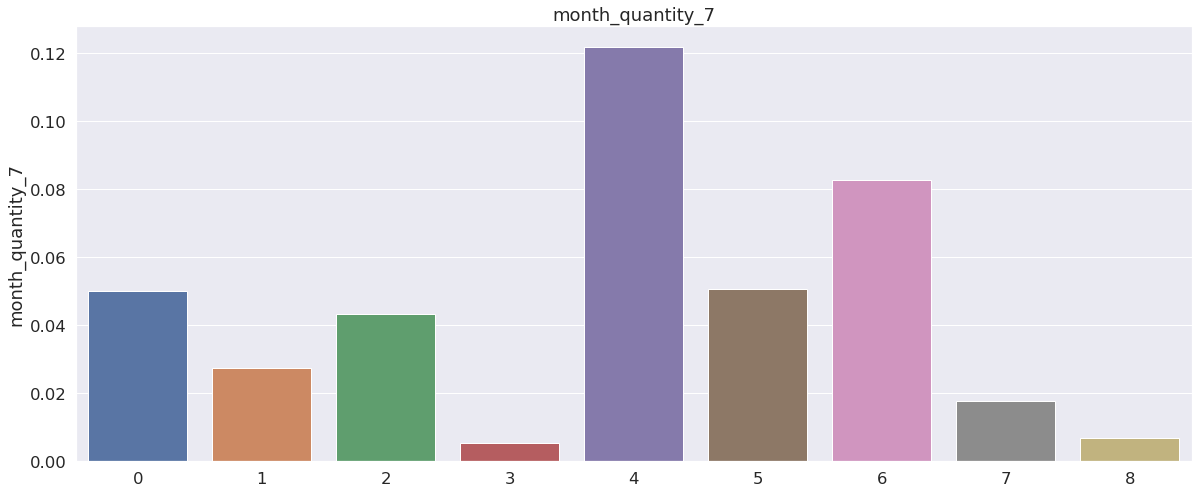

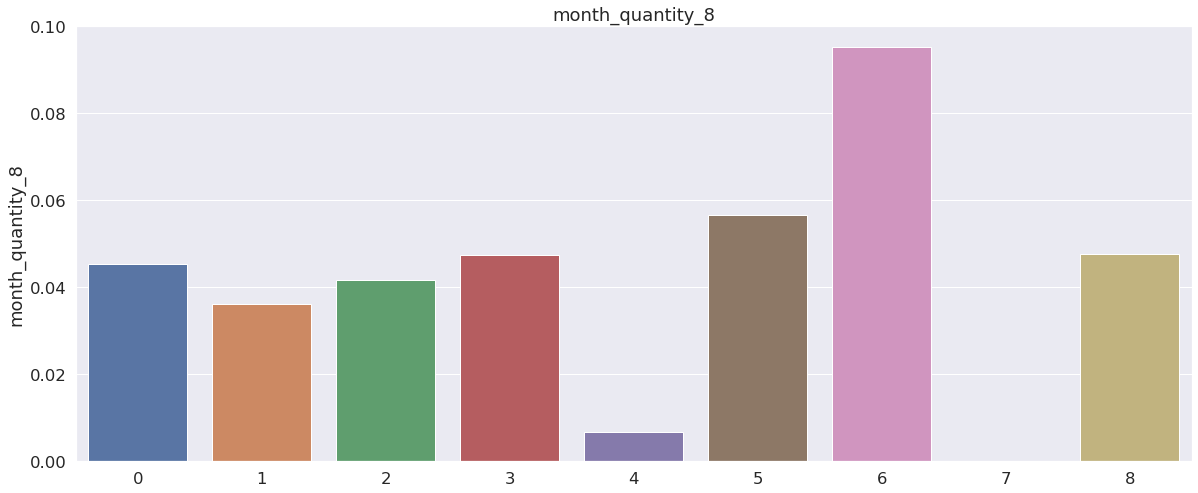

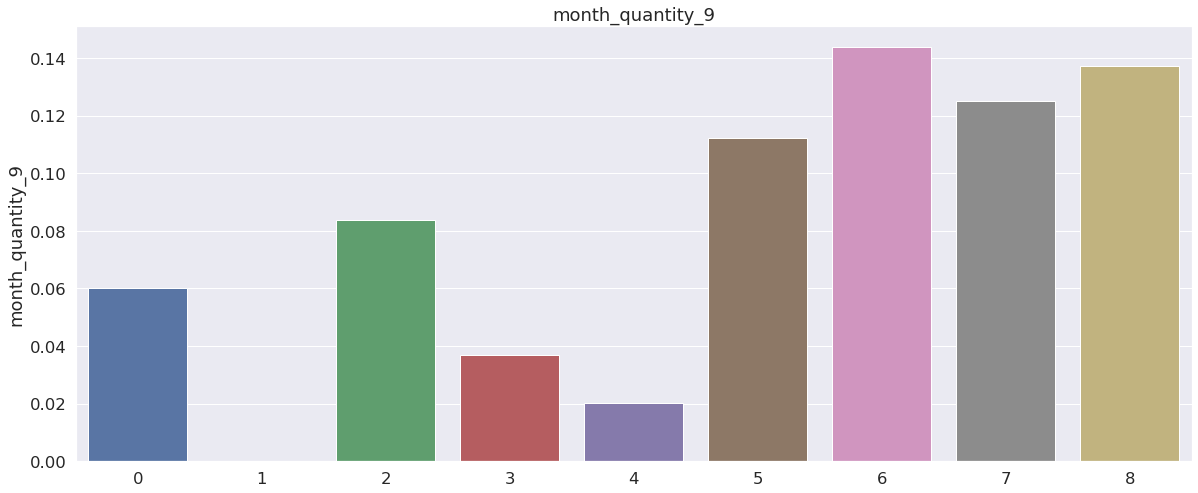

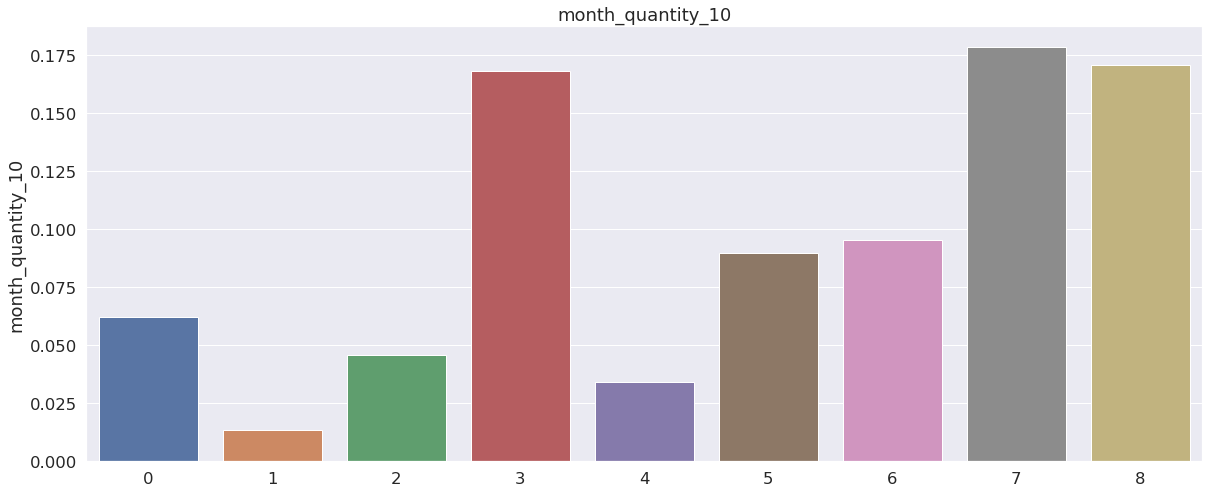

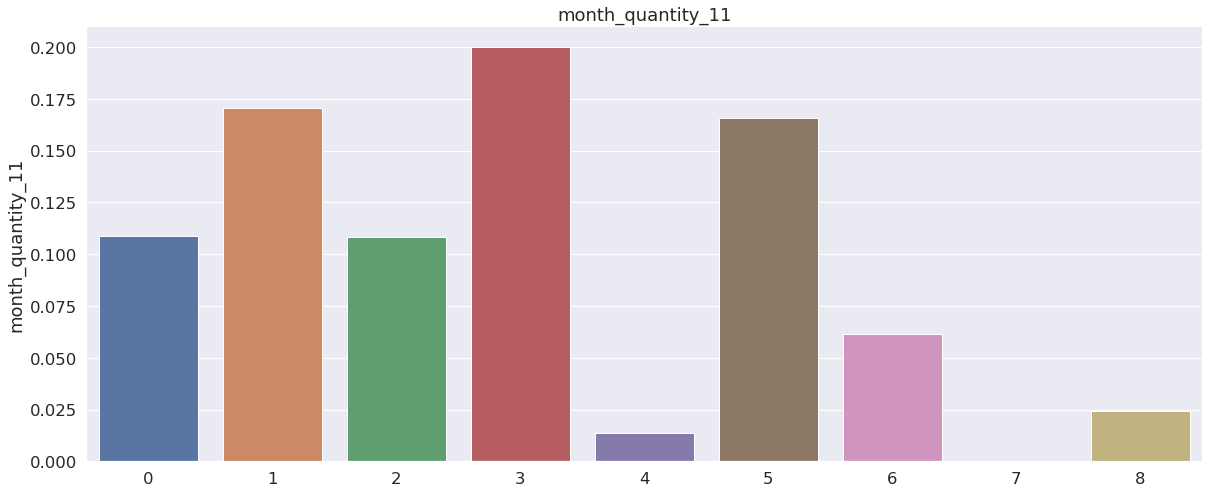

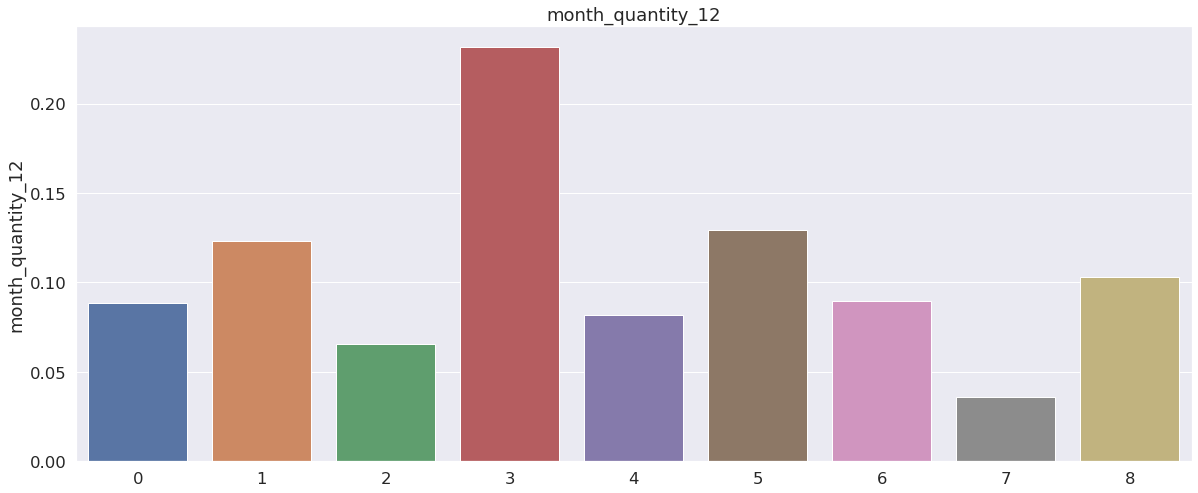

In [34]:
for month in month_cols:
    ax = sns.barplot(x=df_centroids.index, y=month, data=df_centroids)
    ax.set_title(month)
    plt.show()

In [35]:
channel_cols = [c for c in df_centroids.columns if 'channel' in c]

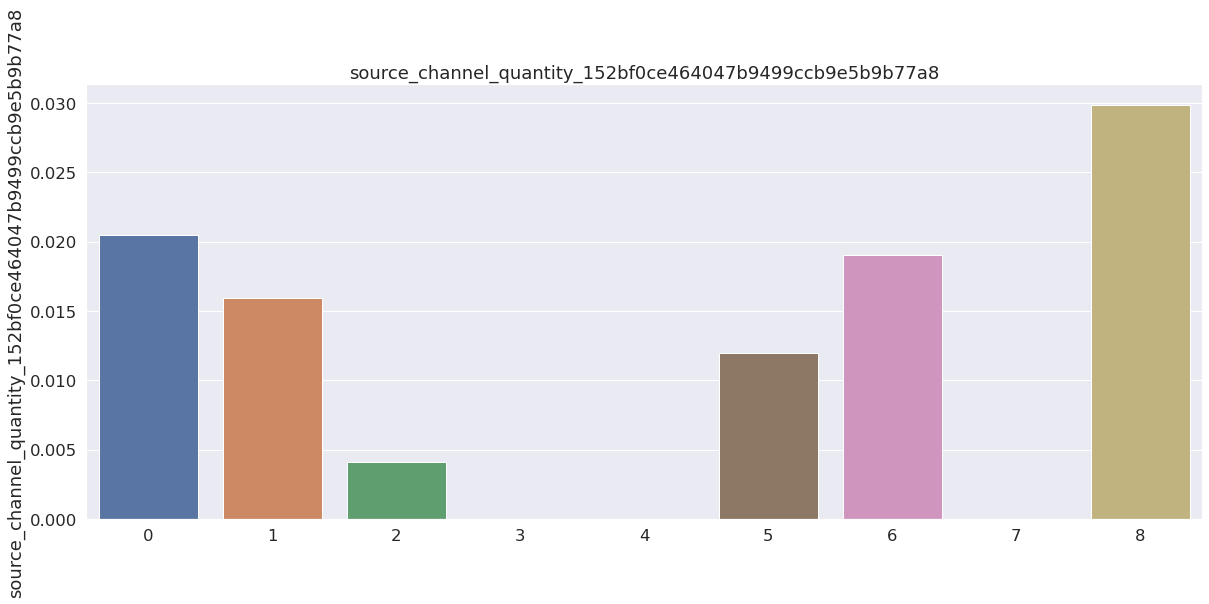

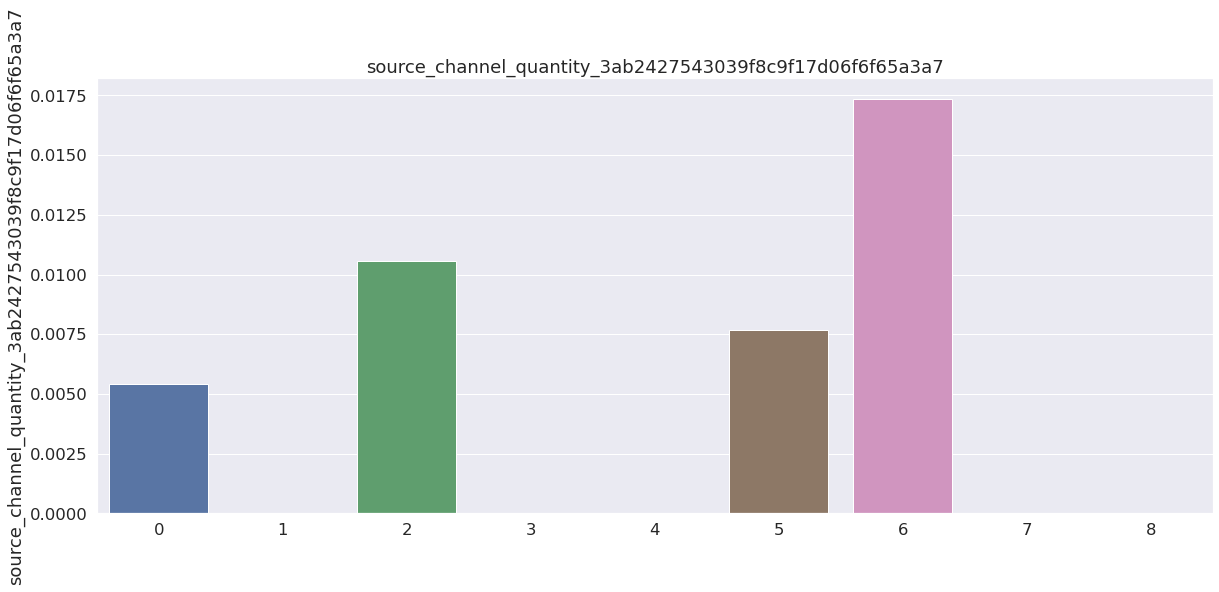

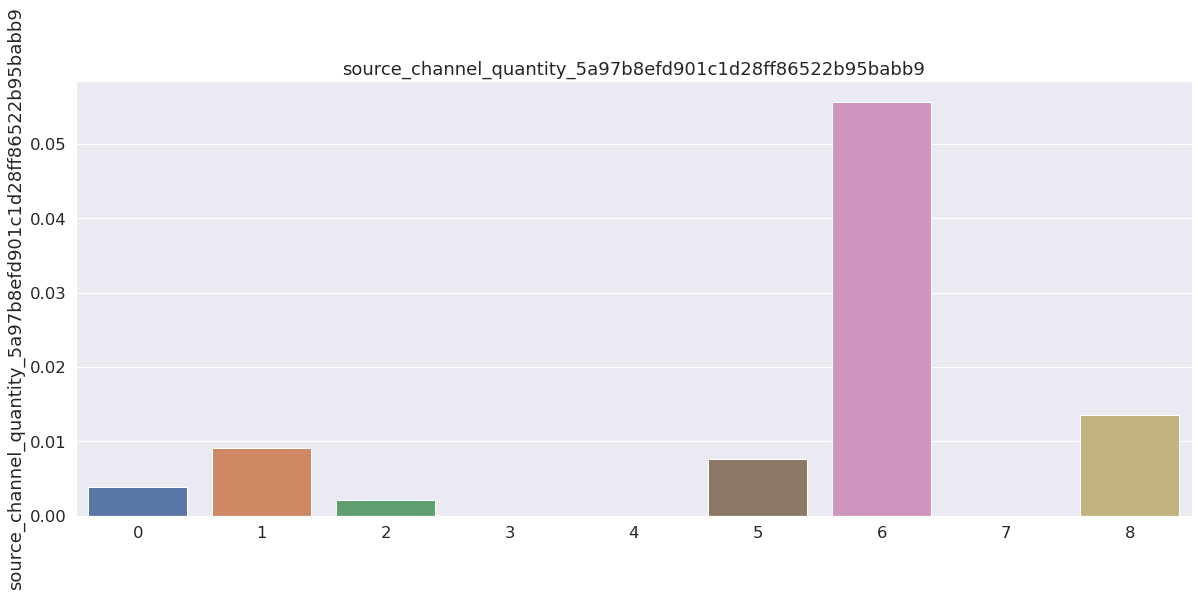

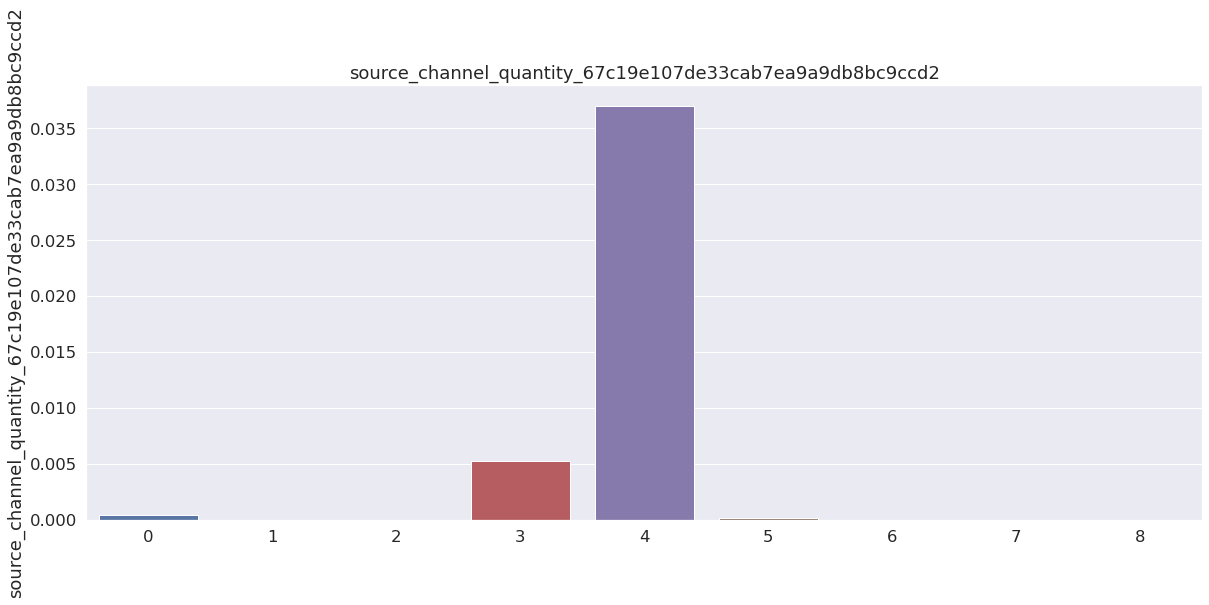

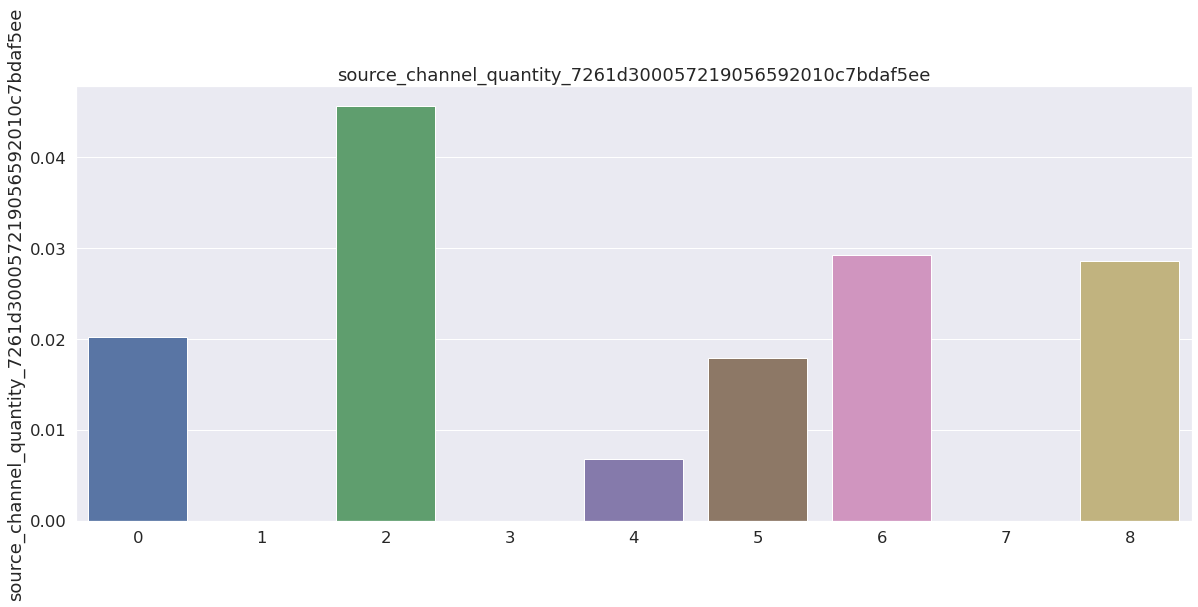

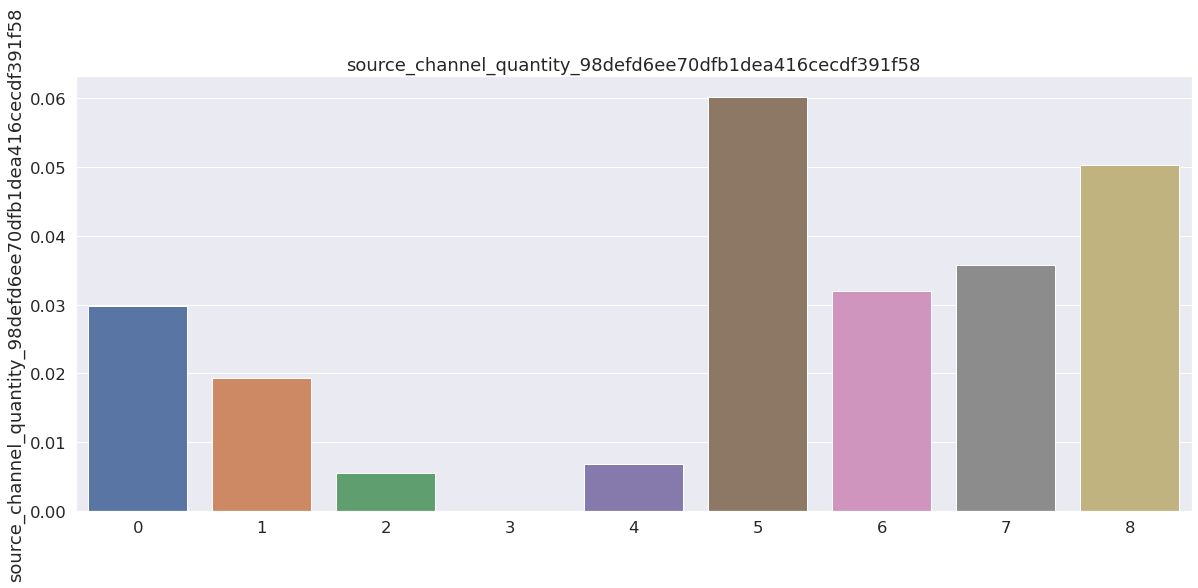

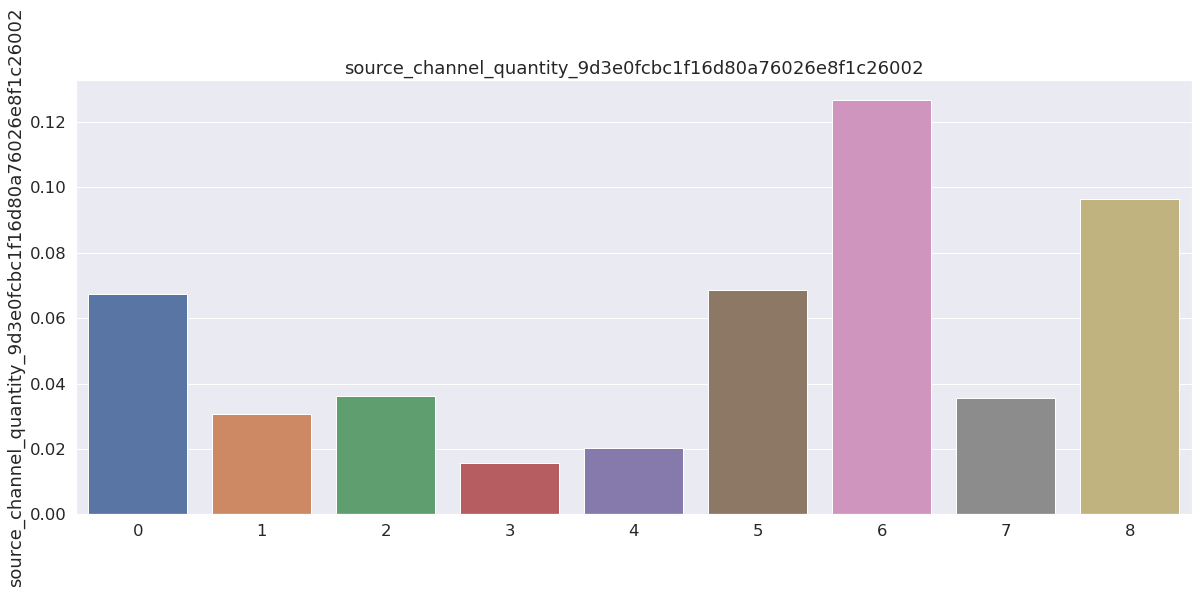

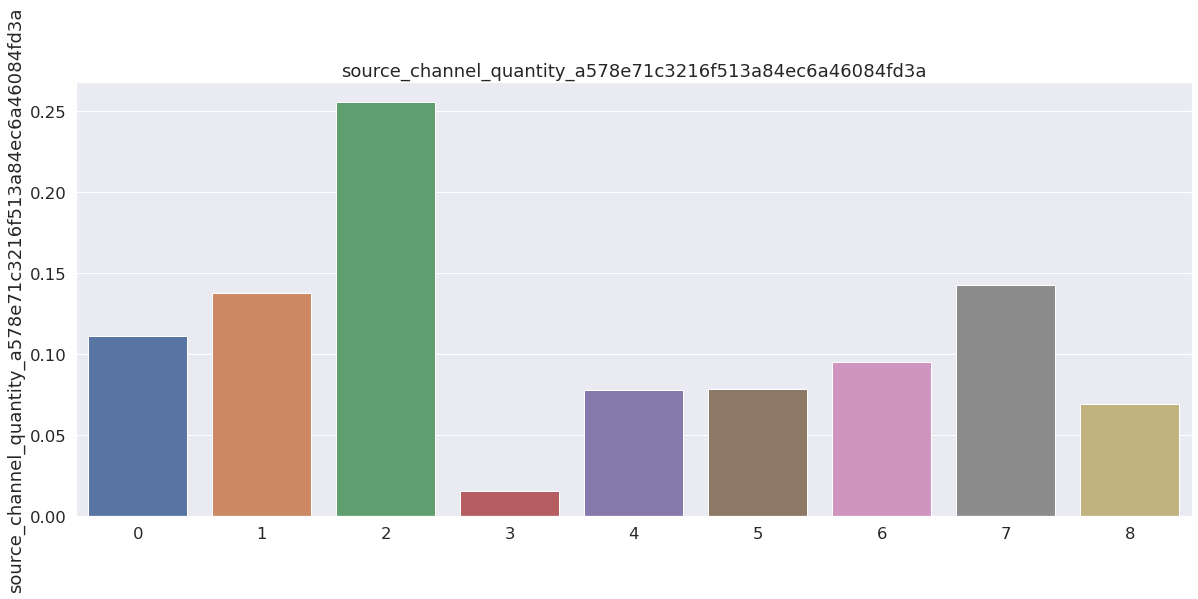

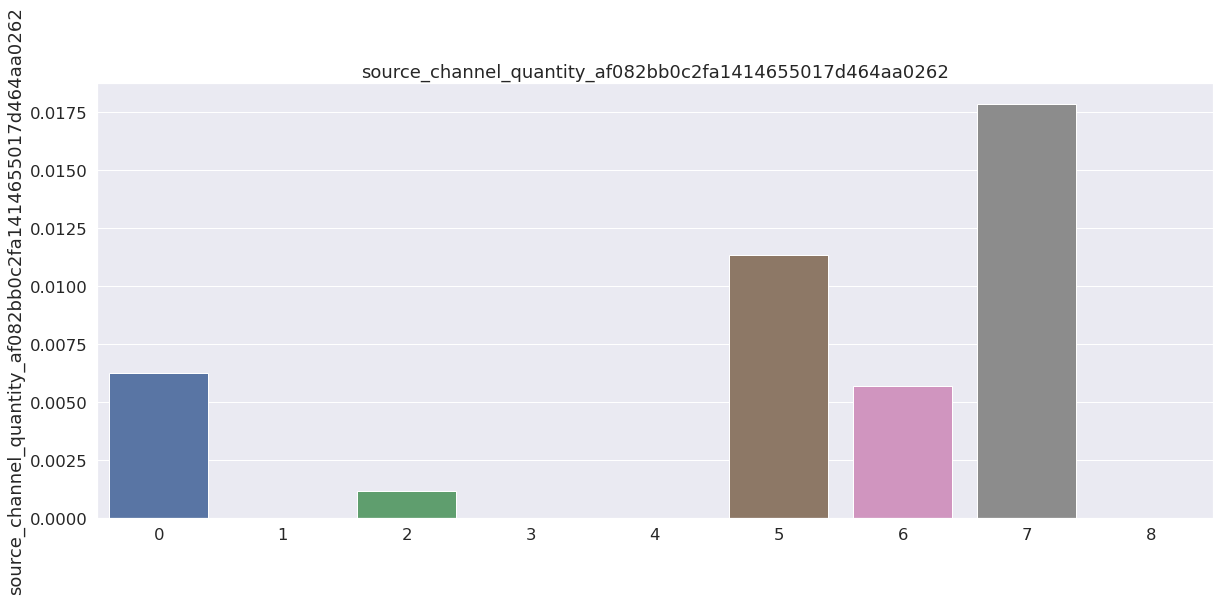

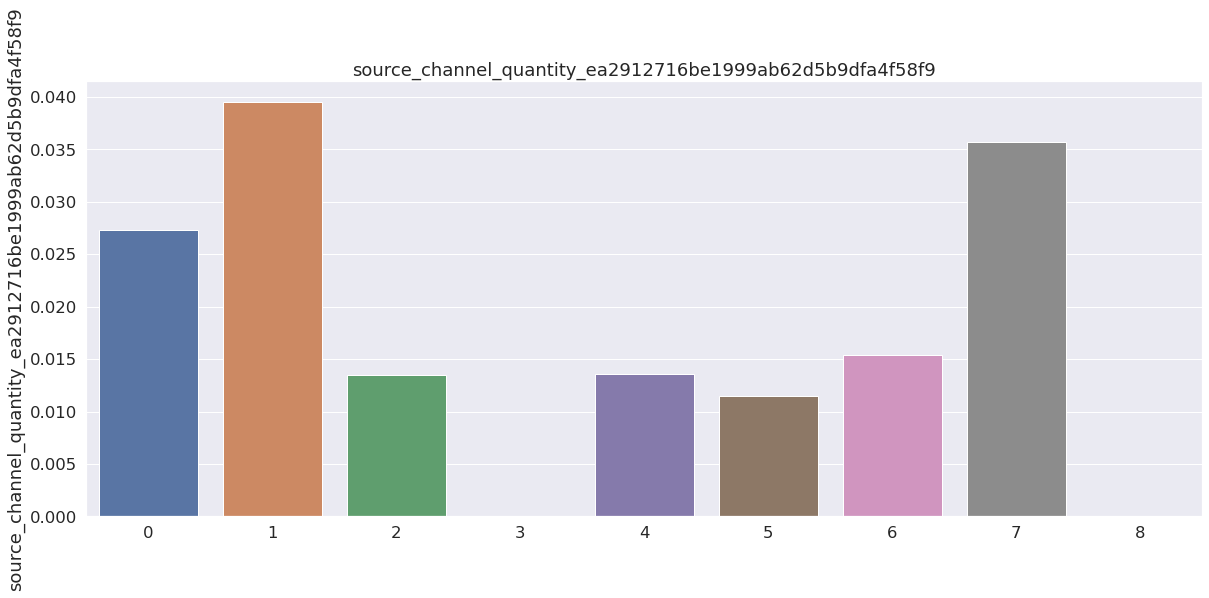

In [36]:
for channel in channel_cols:
    ax = sns.barplot(x=df_centroids.index, y=channel, data=df_centroids)
    ax.set_title(channel)
    plt.show()

In [37]:
df_centroids[['cat_code']]

,cat_code
0,1.554312e-15
1,5.000000e+00
2,8.666667e+00
3,3.000000e+00
4,1.000000e+01
5,4.000000e+00
6,6.000000e+00
7,7.000000e+00
8,1.333333e+00


In [38]:
other_cols = [c for c in df_centroids.columns if c not in channel_cols and c not in month_cols and c != 'cat_code']

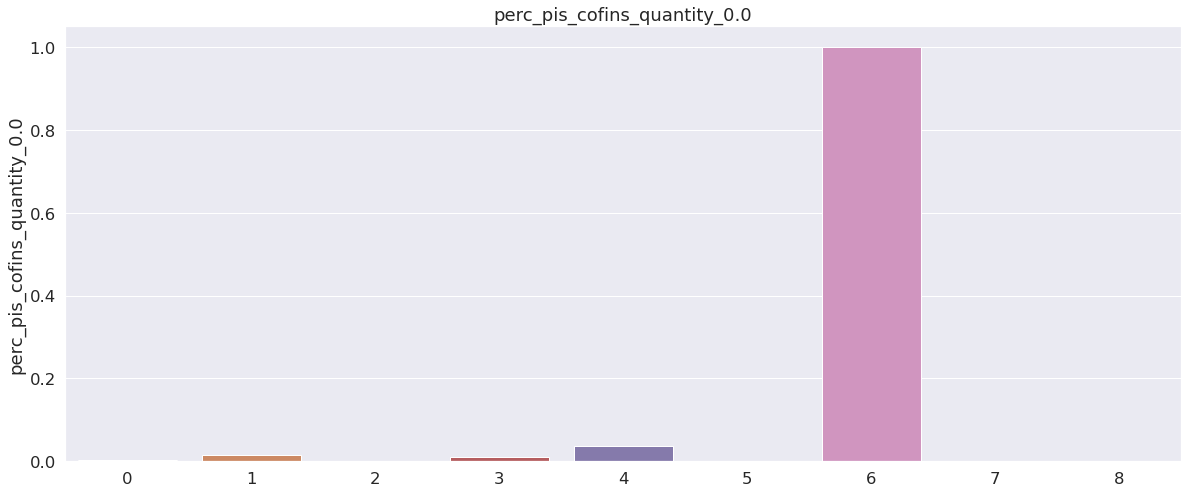

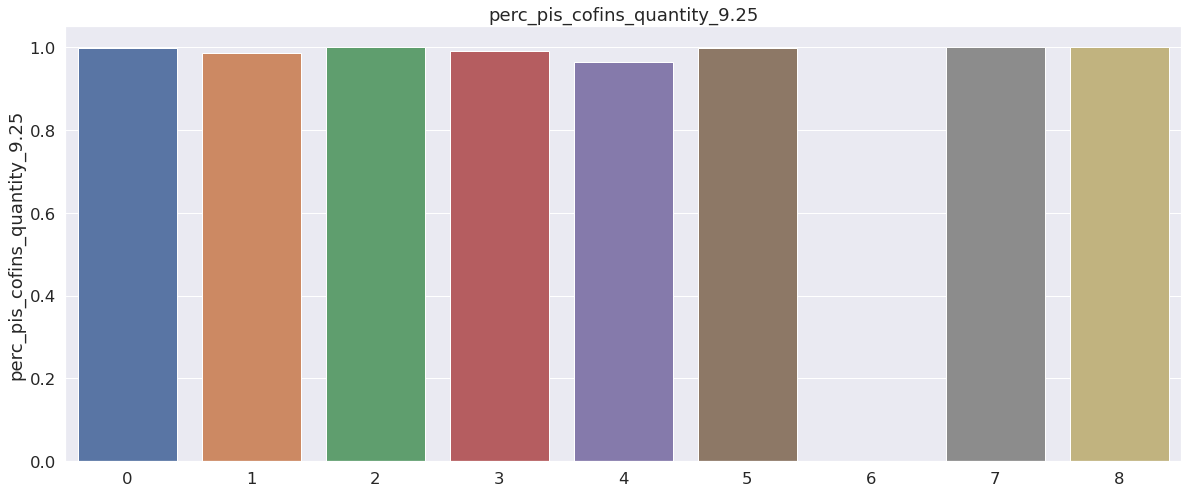

In [39]:
for col in other_cols:
    ax = sns.barplot(x=df_centroids.index, y=col, data=df_centroids)
    ax.set_title(col)
    plt.show()